In [1]:
#Step 1: Initial exploration of the Dataset

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [4]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

<b>Lets explore the GDP per capita data for India</b>

In [347]:
gdp_filter = 'GDP per capita \(constant 2005'
country_filter = 'IND'

mask1 = data['CountryCode'].str.contains(country_filter)
mask2 = data['IndicatorName'].str.contains(gdp_filter)

gdp_data = data[mask1 & mask2]

In [348]:
gdp_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11616,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,228.304470
36555,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,232.142053
64095,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,234.166685
92540,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,243.176418
121337,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,255.963668


<b>Exploring the changes in GDP of India by plotting a line plot</b>

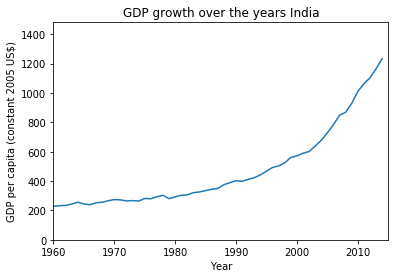

In [358]:
# switch to a line plot
plt.plot(stage1['Year'].values, stage1['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_data['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP growth over the years India')

# to make more honest, start they y axis at 0
plt.axis([gdp_data['Year'].min(),gdp_data['Year'].max()+1,0,1.2*gdp_data['Value'].max()])

plt.show()

We can see there has been a substantial growth in GDP since 1990.

<b>Lets see how the health expenditure have changed over the years for India</b>

In [360]:
health_exp_filter = 'Health expenditure per capita, PPP \(constant 2011'

mask3 = data['IndicatorName'].str.contains(health_exp_filter)

health_exp_data = data[mask1 & mask3]

In [498]:
health_exp_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2550714,India,IND,"Health expenditure per capita, PPP (constant 2...",SH.XPD.PCAP.PP.KD,1995,62.693714
2685735,India,IND,"Health expenditure per capita, PPP (constant 2...",SH.XPD.PCAP.PP.KD,1996,65.399908
2821168,India,IND,"Health expenditure per capita, PPP (constant 2...",SH.XPD.PCAP.PP.KD,1997,74.078822
2958144,India,IND,"Health expenditure per capita, PPP (constant 2...",SH.XPD.PCAP.PP.KD,1998,79.051808
3097440,India,IND,"Health expenditure per capita, PPP (constant 2...",SH.XPD.PCAP.PP.KD,1999,80.501938


<b>We can check how the growth in the GDP affected the health expenditure by looking at the correlation.</b>

In [364]:
filtered_gdp_data = gdp_data[gdp_data['Year'].isin(health_exp_data['Year'].unique().tolist())]

In [365]:
np.corrcoef(filtered_stage1['Value'], stage2['Value'])

array([[1.        , 0.99432724],
       [0.99432724, 1.        ]])

A correlation of 0.99 is a very good correlation. So we can conclude the GDP growth have lead to proportional increase in health expenditure in India.

In [366]:
life_exp_filter = 'Life expectancy at birth, total \(years\)'

mask4 = data['IndicatorName'].str.contains(life_exp_filter)

life_exp_data = data[mask1 & mask4]

In [381]:
life_exp_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11684,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,41.171951
36635,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1961,41.790488
64177,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1962,42.417415
92622,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1963,43.052732
121419,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1964,43.698415


Lets plot this data across the line plot to understand it better.

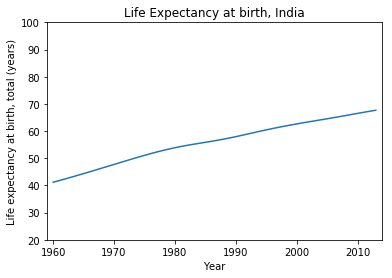

<Figure size 1440x720 with 0 Axes>

In [378]:
# switch to a line plot
plt.plot(life_exp_data['Year'].values, life_exp_data['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(life_exp_data['IndicatorName'].iloc[0])

#label the figure
plt.title('Life Expectancy at birth, India')

# to make more honest, start they y axis at 0
plt.axis([1959,2014,20,100])
plt.figure(figsize=(20,10))
plt.show()

<b>Lets plot a scatterplot to check the relationship between the GDP and Life expectancy.</b>

We will merge the two dataframes GDP and Life expectancy into new dataframe country_data

In [385]:
country_data = pd.merge(gdp_data,life_exp_data[['IndicatorName','Year','Value']], on='Year', how='inner')

In [499]:
country_data = pd.merge(country_data, health_exp_data[['Year','Value']], on='Year', how='left')

In [522]:
country_data=country_data.fillna(country_data['Value'].min())

In [523]:
country_data.head()

,CountryName,CountryCode,IndicatorName_x,IndicatorCode,Year,Value_x,IndicatorName_y,Value_y,Value
0,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,228.304470,"Life expectancy at birth, total (years)",41.171951,62.693714
1,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,232.142053,"Life expectancy at birth, total (years)",41.790488,62.693714
2,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,234.166685,"Life expectancy at birth, total (years)",42.417415,62.693714
3,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,243.176418,"Life expectancy at birth, total (years)",43.052732,62.693714
4,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,255.963668,"Life expectancy at birth, total (years)",43.698415,62.693714


New column 'Value_y' having values for life expectancy merged with the gdp_data dataframe 

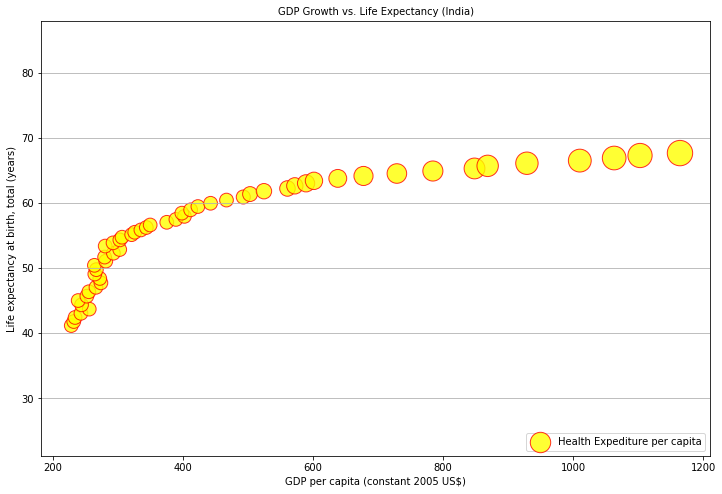

In [550]:
fig, axis = plt.subplots(figsize=(12,8))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('GDP Growth vs. Life Expectancy (India)',fontsize=10)
axis.set_xlabel(country_data['IndicatorName_x'].iloc[0],fontsize=10)
axis.set_ylabel(country_data['IndicatorName_y'].iloc[0],fontsize=10)
axis.set_ylim(country_data['Value_y'].min()-20, 1.3*country_data['Value_y'].max())

X = country_data['Value_x']
Y = country_data['Value_y']
S = country_data['Value']*3

axis.scatter(X, Y, s=S,label='Health Expediture per capita',
               alpha=0.8, color='yellow', edgecolors='Red')
axis.legend(loc='lower right',prop={'weight':'roman','size':'medium'})

plt.show()

In [528]:
np.corrcoef(country_data['Value_x'],country_data['Value_y'])

array([[1.        , 0.84850089],
       [0.84850089, 1.        ]])

In [530]:
country_data[['Value_x','Value_y','Value']].corr()

,Value_x,Value_y,Value
Value_x,1.000000,0.848501,0.963184
Value_y,0.848501,1.000000,0.698013
Value,0.963184,0.698013,1.000000


<b>Scatterplot and correlation value of 0.85 clearly shows there is strong relationship between the GDP growth and Life expectancy. With the growth in GDP, life expectancy have increased over the years in India. Lets apply this finding to other countries in our dataset.</b>

In [391]:
world_gdp_data = data[mask2]
world_life_exp_data = data[mask4]

In [450]:
world_gdp_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
263,East Asia & Pacific (all income levels),EAS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,982.026842
376,East Asia & Pacific (developing only),EAP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,168.600612
517,Euro area,EMU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,9388.717505
623,Europe & Central Asia (all income levels),ECS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,6547.964873
835,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,8997.466960


In [497]:
matching = [ind for ind in indicators if 'index' in ind]
matching

['Consumer price index (2010 = 100)',
 'Wholesale price index (2010 = 100)',
 'Crop production index (2004-2006 = 100)',
 'Food production index (2004-2006 = 100)',
 'Livestock production index (2004-2006 = 100)',
 'Gross enrolment ratio, primary and secondary, gender parity index (GPI)',
 'Gross enrolment ratio, primary, gender parity index (GPI)',
 'Gross enrolment ratio, secondary, gender parity index (GPI)',
 'Gross enrolment ratio, tertiary, gender parity index (GPI)',
 'Real effective exchange rate index (2010 = 100)',
 'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
 'Export value index (2000 = 100)',
 'Import value index (2000 = 100)',
 'Export volume index (2000 = 100)',
 'Import volume index (2000 = 100)',
 'Net barter terms of trade index (2000 = 100)',
 'GINI index (World Bank estimate)',
 'Liner shipping connectivity index (maximum value in 2004 = 100)',
 'Business extent of disclosure index (0=less disclosure to 10=more disclosure)',
 'IDA resour